# **A20000755,Mohamed Elnakshbandy,Assignment 3**

# **General **

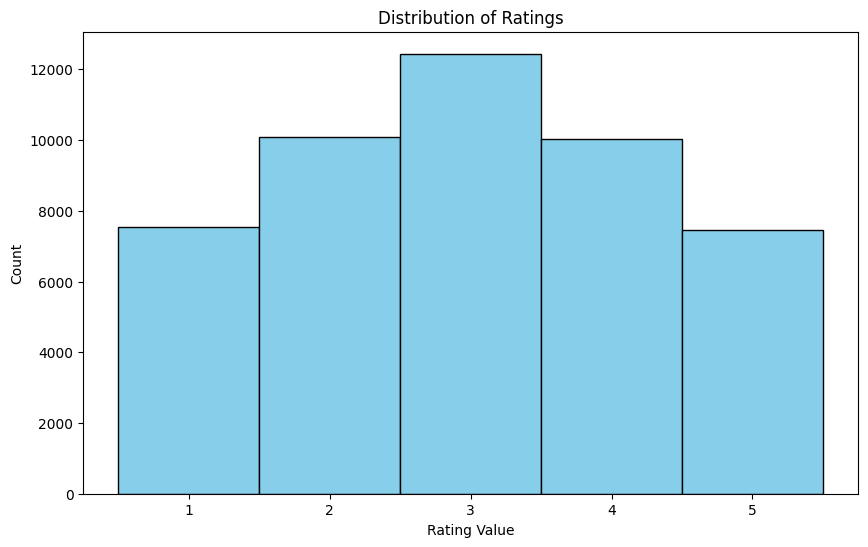

General requirements completed and results saved.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/user_item_matrix (1).csv'
dataset = pd.read_csv(file_path)

Tnu = dataset.shape[1] - 1
Tni = dataset.shape[0]


ratings_per_item = dataset.iloc[:, 1:].notna().sum(axis=1)
dataset['rating_count'] = ratings_per_item

rating_values = dataset.iloc[:, 1:].values.flatten()
valid_ratings = rating_values[~np.isnan(rating_values)]

plt.figure(figsize=(10, 6))
plt.hist(valid_ratings, bins=np.arange(1, 7) - 0.5, edgecolor='black', color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating Value")
plt.ylabel("Count")
plt.xticks(range(1, 6))
plt.show()

missing_ratings = np.isnan(rating_values).sum()
total_possible_ratings = Tni * Tnu
sparsity = (missing_ratings / total_possible_ratings) * 100

mean_rating = np.mean(valid_ratings)
std_dev_rating = np.std(valid_ratings)

average_ratings = dataset.iloc[:, 1:-1].mean(axis=1)
dataset['average_rating'] = average_ratings
lowest_rated_items = dataset.nsmallest(2, 'average_rating')
I1, I2 = lowest_rated_items['title'].values

results_summary = {
    "Total Users (Tnu)": Tnu,
    "Total Items (Tni)": Tni,
    "Sparsity (%)": sparsity,
    "Mean Rating": mean_rating,
    "Rating Std Dev": std_dev_rating,
    "Lowest Rated Items": (I1, I2)
}

with open('general_results_summary.txt', 'w') as f:
    for key, value in results_summary.items():
        f.write(f"{key}: {value}\n")

print("General requirements completed and results saved.")



# **Part 1**

In [9]:
import pandas as pd
import numpy as np

file_path = '/content/user_item_matrix (1).csv'
dataset = pd.read_csv(file_path)

dataset_transposed = dataset.set_index('title').T
print("Dataset after transposing:\n", dataset_transposed.head())

I1 = 'Dick Johnson Is Dead'
I2 = 'My Little Pony: A New Generation'

if I1 not in dataset_transposed.columns or I2 not in dataset_transposed.columns:
    raise KeyError(f"One or both target items ('{I1}', '{I2}') not found in the dataset.")

def calculate_average_rating(item):
    return dataset_transposed[item].mean(skipna=True)

average_rating_I1 = calculate_average_rating(I1)
average_rating_I2 = calculate_average_rating(I2)

print(f"Average Rating for {I1}: {average_rating_I1}")
print(f"Average Rating for {I2}: {average_rating_I2}")


def mean_fill(item, mean_value):
    dataset_transposed[item] = dataset_transposed[item].fillna(mean_value)

mean_fill(I1, average_rating_I1)
mean_fill(I2, average_rating_I2)


item_means = dataset_transposed.mean(axis=0)
print("Item Means:\n", item_means)

def calculate_differences():
    return dataset_transposed.subtract(item_means, axis=1)

rating_differences = calculate_differences()

def compute_covariance(item1, item2):
    return rating_differences[item1].cov(rating_differences[item2])

covariance_matrix = rating_differences.cov()
print("Covariance Matrix:\n", covariance_matrix)


def top_peers(item, num_peers):
    correlations = covariance_matrix[item].sort_values(ascending=False)
    return correlations.index[1:num_peers + 1]

top_5_peers_I1 = top_peers(I1, 5)
top_10_peers_I1 = top_peers(I1, 10)
top_5_peers_I2 = top_peers(I2, 5)
top_10_peers_I2 = top_peers(I2, 10)

print(f"Top 5 Peers for {I1}: {top_5_peers_I1}")
print(f"Top 10 Peers for {I1}: {top_10_peers_I1}")
print(f"Top 5 Peers for {I2}: {top_5_peers_I2}")
print(f"Top 10 Peers for {I2}: {top_10_peers_I2}")

def reduced_space(users, top_peers):
    return dataset_transposed[top_peers].loc[users]

reduced_space_I1_top5 = reduced_space(dataset_transposed.index, top_5_peers_I1)
reduced_space_I2_top5 = reduced_space(dataset_transposed.index, top_5_peers_I2)


def predict_ratings(reduced_space, target_item):
    return reduced_space.mean(axis=1)

predicted_ratings_I1_top5 = predict_ratings(reduced_space_I1_top5, I1)
predicted_ratings_I2_top5 = predict_ratings(reduced_space_I2_top5, I2)


reduced_space_I1_top10 = reduced_space(dataset_transposed.index, top_10_peers_I1)
reduced_space_I2_top10 = reduced_space(dataset_transposed.index, top_10_peers_I2)

predicted_ratings_I1_top10 = predict_ratings(reduced_space_I1_top10, I1)
predicted_ratings_I2_top10 = predict_ratings(reduced_space_I2_top10, I2)


def compare_predictions(predictions_top5, predictions_top10):
    return (predictions_top5 - predictions_top10).abs().mean()

comparison_I1 = compare_predictions(predicted_ratings_I1_top5, predicted_ratings_I1_top10)
comparison_I2 = compare_predictions(predicted_ratings_I2_top5, predicted_ratings_I2_top10)

print(f"Comparison for {I1}: {comparison_I1}")
print(f"Comparison for {I2}: {comparison_I2}")

results_summary = {
    "Average Rating I1": average_rating_I1,
    "Average Rating I2": average_rating_I2,
    "Top 5 Peers I1": list(top_5_peers_I1),
    "Top 10 Peers I1": list(top_10_peers_I1),
    "Top 5 Peers I2": list(top_5_peers_I2),
    "Top 10 Peers I2": list(top_10_peers_I2),
    "Comparison I1": comparison_I1,
    "Comparison I2": comparison_I2
}

with open('pca_mean_filling_results.txt', 'w') as f:
    for key, value in results_summary.items():
        f.write(f"{key}: {value}\n")

print("PCA with Mean-Filling completed and results saved.")





Dataset after transposing:
 title   Dick Johnson Is Dead  My Little Pony: A New Generation  Sankofa  \
User_1                   3.0                               NaN      4.0   
User_2                   4.0                               3.0      2.0   
User_3                   2.0                               3.0      5.0   
User_4                   3.0                               3.0      1.0   
User_5                   2.0                               2.0      5.0   

title   The Starling  Je Suis Karl  Confessions of an Invisible Girl  \
User_1           3.0           2.0                               2.0   
User_2           5.0           4.0                               2.0   
User_3           4.0           5.0                               4.0   
User_4           2.0           3.0                               3.0   
User_5           2.0           2.0                               4.0   

title   Europe's Most Dangerous Man: Otto Skorzeny in Spain  Intrusion  \
User_1        

# **Part 2**

In [10]:


import pandas as pd
import numpy as np

file_path = '/content/user_item_matrix (1).csv'
dataset = pd.read_csv(file_path)

dataset_transposed = dataset.set_index('title').T

I1 = 'Dick Johnson Is Dead'
I2 = 'My Little Pony: A New Generation'

if I1 not in dataset_transposed.columns or I2 not in dataset_transposed.columns:
    raise KeyError(f"One or both target items ('{I1}', '{I2}') not found in the dataset.")

covariance_matrix = dataset_transposed.cov()
print("Covariance Matrix:\n", covariance_matrix)


def top_peers(item, num_peers):
    correlations = covariance_matrix[item].sort_values(ascending=False)
    return correlations.index[1:num_peers + 1]


top_5_peers_I1 = top_peers(I1, 5)
top_10_peers_I1 = top_peers(I1, 10)
top_5_peers_I2 = top_peers(I2, 5)
top_10_peers_I2 = top_peers(I2, 10)

print(f"Top 5 Peers for {I1}: {top_5_peers_I1}")
print(f"Top 10 Peers for {I1}: {top_10_peers_I1}")
print(f"Top 5 Peers for {I2}: {top_5_peers_I2}")
print(f"Top 10 Peers for {I2}: {top_10_peers_I2}")

def reduced_space(users, top_peers):
    return dataset_transposed[top_peers].loc[users]

reduced_space_I1_top5 = reduced_space(dataset_transposed.index, top_5_peers_I1)
reduced_space_I2_top5 = reduced_space(dataset_transposed.index, top_5_peers_I2)

def predict_ratings(reduced_space, target_item):
    return reduced_space.mean(axis=1)

predicted_ratings_I1_top5 = predict_ratings(reduced_space_I1_top5, I1)
predicted_ratings_I2_top5 = predict_ratings(reduced_space_I2_top5, I2)

reduced_space_I1_top10 = reduced_space(dataset_transposed.index, top_10_peers_I1)
reduced_space_I2_top10 = reduced_space(dataset_transposed.index, top_10_peers_I2)

predicted_ratings_I1_top10 = predict_ratings(reduced_space_I1_top10, I1)
predicted_ratings_I2_top10 = predict_ratings(reduced_space_I2_top10, I2)

def compare_predictions(predictions_top5, predictions_top10):
    return (predictions_top5 - predictions_top10).abs().mean()

comparison_I1_peers = compare_predictions(predicted_ratings_I1_top5, predicted_ratings_I1_top10)
comparison_I2_peers = compare_predictions(predicted_ratings_I2_top5, predicted_ratings_I2_top10)

print(f"Comparison for {I1} (Top 5 vs Top 10): {comparison_I1_peers}")
print(f"Comparison for {I2} (Top 5 vs Top 10): {comparison_I2_peers}")

results_summary = {
    "Top 5 Peers I1": list(top_5_peers_I1),
    "Top 10 Peers I1": list(top_10_peers_I1),
    "Top 5 Peers I2": list(top_5_peers_I2),
    "Top 10 Peers I2": list(top_10_peers_I2),
    "Comparison I1 (Top 5 vs Top 10)": comparison_I1_peers,
    "Comparison I2 (Top 5 vs Top 10)": comparison_I2_peers,

}

with open('pca_part2_results.txt', 'w') as f:
    for key, value in results_summary.items():
        f.write(f"{key}: {value}\n")

print("PCA Part 2 completed and results saved.")


Covariance Matrix:
 title                             Dick Johnson Is Dead  \
title                                                    
Dick Johnson Is Dead                          1.595297   
My Little Pony: A New Generation              0.284737   
Sankofa                                      -0.299285   
The Starling                                  0.199952   
Je Suis Karl                                  0.111083   
...                                                ...   
Company of Heroes                             0.112487   
Cradle 2 the Grave                           -0.020513   
Domestic Disturbance                         -0.176557   
Dream/Killer                                  0.069233   
Felon                                        -0.111600   

title                             My Little Pony: A New Generation   Sankofa  \
title                                                                          
Dick Johnson Is Dead                                      0.28473

# **Part 3**

In [13]:
import numpy as np
import pandas as pd

file_path = '/content/user_item_matrix (1).csv'
dataset = pd.read_csv(file_path)


R = dataset.set_index('title').T

I1 = "Dick Johnson Is Dead"
I2 = "My Little Pony: A New Generation"

if I1 not in R.columns or I2 not in R.columns:
    raise KeyError(f"One or both target items ('{I1}', '{I2}') not found in the dataset.")

average_ratings = R.mean(axis=0)
print("Average Ratings for Each Item:\n", average_ratings)

R_filled = R.copy()
for col in R_filled.columns:
    R_filled[col].fillna(average_ratings[col], inplace=True)

U, Sigma, Vt = np.linalg.svd(R_filled, full_matrices=False)
eigenvalues = Sigma**2 / (len(R_filled) - 1)
eigenvectors = Vt.T

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


orthogonality_check = np.allclose(eigenvectors.T @ eigenvectors, np.eye(eigenvectors.shape[1]))
if orthogonality_check:
    print("Eigenvectors are orthogonal.")
else:
    print("Eigenvectors are NOT orthogonal. Proceeding to step 3.4.5.")


normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)
orthogonality_check_after = np.allclose(normalized_eigenvectors.T @ normalized_eigenvectors, np.eye(normalized_eigenvectors.shape[1]))
print("Orthogonality after normalization:", orthogonality_check_after)


orthonormal_check = np.allclose(normalized_eigenvectors.T @ normalized_eigenvectors, np.eye(normalized_eigenvectors.shape[1]))
if orthonormal_check:
    print("Eigenvectors are orthonormal.")
else:
    print("Eigenvectors are NOT orthonormal. Proceeding to step 3.4.7.")



def gram_schmidt(vectors):
    orthonormal_vectors = []
    for v in vectors.T:
        for u in orthonormal_vectors:
            v = v - np.dot(u, v) * u
        v = v / np.linalg.norm(v)
        orthonormal_vectors.append(v)
    return np.array(orthonormal_vectors).T

orthonormal_eigenvectors = gram_schmidt(normalized_eigenvectors)

Sigma_matrix = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(Sigma_matrix, Sigma)


V = orthonormal_eigenvectors
U_predicted = U @ Sigma_matrix

R_reconstructed = U_predicted @ V.T
print("Reconstructed Rating Matrix:\n", pd.DataFrame(R_reconstructed, index=R.index, columns=R.columns))

missing_ratings_I1 = R.loc[:, I1].isna()
missing_ratings_I2 = R.loc[:, I2].isna()

predicted_ratings_I1 = R_reconstructed[missing_ratings_I1, R.columns.get_loc(I1)]
predicted_ratings_I2 = R_reconstructed[missing_ratings_I2, R.columns.get_loc(I2)]

print(f"Predicted Ratings for Missing Values in {I1}:\n", predicted_ratings_I1)
print(f"Predicted Ratings for Missing Values in {I2}:\n", predicted_ratings_I2)


outputs = {
    "Average Ratings": average_ratings.to_dict(),
    "Eigenvalues": eigenvalues.tolist(),
    "Eigenvectors": eigenvectors.tolist(),
    "Orthogonality Check": orthogonality_check,
    "Orthogonality After Normalization": orthogonality_check_after,
    "Orthonormality Check": orthonormal_check,
    "Reconstructed Rating Matrix": R_reconstructed.tolist(),
    f"Predicted Ratings for Missing Values in {I1}": predicted_ratings_I1.tolist(),
    f"Predicted Ratings for Missing Values in {I2}": predicted_ratings_I2.tolist()
}




Average Ratings for Each Item:
 title
Dick Johnson Is Dead                3.021053
My Little Pony: A New Generation    2.614583
Sankofa                             3.106383
The Starling                        2.937500
Je Suis Karl                        3.106383
                                      ...   
Company of Heroes                   3.180851
Cradle 2 the Grave                  3.187500
Domestic Disturbance                2.875000
Dream/Killer                        2.967391
Felon                               3.093750
Length: 500, dtype: float64


<ipython-input-13-e28019a6ec94>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  R_filled[col].fillna(average_ratings[col], inplace=True)


Eigenvalues:
 [4.54380989e+03 1.68366418e+01 1.61455726e+01 1.56548000e+01
 1.50901794e+01 1.47503048e+01 1.44609888e+01 1.44259630e+01
 1.40936578e+01 1.37665898e+01 1.34002202e+01 1.32542013e+01
 1.31714460e+01 1.28889602e+01 1.28848349e+01 1.26983547e+01
 1.24805988e+01 1.23484917e+01 1.18902296e+01 1.17767177e+01
 1.14871947e+01 1.13968943e+01 1.11978393e+01 1.10464259e+01
 1.08079609e+01 1.06032691e+01 1.05615761e+01 1.04428814e+01
 1.02120283e+01 1.01849246e+01 9.88379711e+00 9.82609642e+00
 9.74874579e+00 9.55905933e+00 9.50601770e+00 9.36871967e+00
 9.21053806e+00 9.09921073e+00 8.92779488e+00 8.74511949e+00
 8.72612627e+00 8.63230425e+00 8.46250207e+00 8.40857514e+00
 8.24734801e+00 8.16693805e+00 7.94833336e+00 7.84659533e+00
 7.61617116e+00 7.57042328e+00 7.50891000e+00 7.37716487e+00
 7.20776747e+00 7.10148165e+00 7.00334001e+00 6.86943703e+00
 6.84372474e+00 6.70177555e+00 6.67015403e+00 6.44152610e+00
 6.35008022e+00 6.32658471e+00 6.25123510e+00 6.22094357e+00
 6.1056926